<a href="https://colab.research.google.com/github/Nico-Araujo/Enterprise-Challenge/blob/main/ml/Enterprise_Challenge_ML.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [2]:
# %% [markdown]
# # 🚀 Sistema de Machine Learning Integrado - Monitoramento de Sensores
# ## Hermes Reply - Fase 4: Pipeline Completo
#
# **Parte 1: Upload e Preparação dos Dados**

# %%
# =============================================================================
# CONFIGURAÇÃO INICIAL E IMPORTAÇÕES
# =============================================================================
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from datetime import datetime, timedelta
import warnings
warnings.filterwarnings('ignore')

# Configurações de visualização
plt.style.use('ggplot')
sns.set_palette("husl")
%matplotlib inline

print("✅ Bibliotecas carregadas com sucesso!")

# %%
# =============================================================================
# UPLOAD DO ARQUIVO DE DADOS DOS SENSORES
# =============================================================================
print("📤 Faça o upload do arquivo CSV com os dados dos sensores...")

# Opção 1: Upload no Google Colab
try:
    from google.colab import files
    print("📎 Ambiente Google Colab detectado")
    uploaded = files.upload()

    # Obter nome do arquivo
    filename = list(uploaded.keys())[0]
    print(f"📂 Arquivo carregado: {filename}")

except ImportError:
    # Opção 2: Upload local ou caminho fixo
    print("🌐 Ambiente local detectado")
    filename = input("📝 Digite o caminho do arquivo CSV (ex: 'leituras_stream.csv'): ")

# %%
# =============================================================================
# CARREGAMENTO E VALIDAÇÃO DOS DADOS
# =============================================================================
print("📊 Carregando dados dos sensores...")

try:
    # Carregar dados do CSV
    df_sensores = pd.read_csv(filename, sep=';')
    print(f"✅ Dados carregados com sucesso!")
    print(f"📈 Dimensões: {df_sensores.shape[0]} linhas x {df_sensores.shape[1]} colunas")

    # Exibir estrutura dos dados
    print("\n🔍 Primeiras linhas dos dados:")
    display(df_sensores.head())

    print("\n📋 Informações do dataset:")
    df_sensores.info()

    # Verificar colunas esperadas
    colunas_esperadas = ['id_local', 'data_hora_ms', 'id_sensor', 'valor']
    colunas_faltantes = [col for col in colunas_esperadas if col not in df_sensores.columns]

    if colunas_faltantes:
        print(f"❌ Colunas faltantes: {colunas_faltantes}")
        print("⚠️  Verifique o formato do arquivo CSV")
    else:
        print("✅ Todas as colunas esperadas estão presentes")

except Exception as e:
    print(f"❌ Erro ao carregar arquivo: {e}")
    print("\n📋 Formato esperado do CSV:")
    print("   id_local;data_hora_ms;id_sensor;valor")
    print("   1;1759441735937;1;29.88")
    print("   1;1759441735937;2;0.53")
    print("   1;1759441735937;3;154.86")

# %%
# =============================================================================
# PRÉ-PROCESSAMENTO INICIAL
# =============================================================================
print("🔄 Realizando pré-processamento dos dados...")

try:
    # Verificar valores missing
    missing_data = df_sensores.isnull().sum()
    if missing_data.sum() > 0:
        print("⚠️  Valores missing encontrados:")
        print(missing_data[missing_data > 0])
        # Preencher valores missing
        df_sensores = df_sensores.fillna(method='ffill')
        print("✅ Valores missing preenchidos")
    else:
        print("✅ Nenhum valor missing encontrado")

    # Verificar duplicatas
    duplicatas = df_sensores.duplicated().sum()
    if duplicatas > 0:
        print(f"⚠️  {duplicatas} linhas duplicadas encontradas")
        df_sensores = df_sensores.drop_duplicates()
        print("✅ Duplicatas removidas")
    else:
        print("✅ Nenhuma duplicata encontrada")

    # Verificar tipos de sensores
    sensores_unicos = df_sensores['id_sensor'].unique()
    print(f"🔧 Sensores identificados: {sorted(sensores_unicos)}")

    # Mapear nomes dos sensores
    mapa_sensores = {
        1: 'Temperatura (°C)',
        2: 'Vibração (g)',
        3: 'Distância (cm)'
    }

    print("🎯 Mapeamento de sensores:")
    for sensor_id, sensor_nome in mapa_sensores.items():
        if sensor_id in sensores_unicos:
            print(f"   Sensor {sensor_id}: {sensor_nome}")

    print(f"\n✅ Pré-processamento concluído!")
    print(f"📊 Dados finais: {df_sensores.shape[0]} leituras válidas")

except Exception as e:
    print(f"❌ Erro no pré-processamento: {e}")

# %%
# =============================================================================
# SALVAR DADOS PRÉ-PROCESSADOS
# =============================================================================
# Salvar versão limpa dos dados
df_sensores.to_csv('dados_sensores_limpos.csv', index=False, sep=';')
print("💾 Dados pré-processados salvos como 'dados_sensores_limpos.csv'")

print("\n" + "="*60)
print("🎯 PARTE 1 CONCLUÍDA COM SUCESSO!")
print("📁 Próximo passo: Transformação e Análise Exploratória")
print("="*60)

✅ Bibliotecas carregadas com sucesso!
📤 Faça o upload do arquivo CSV com os dados dos sensores...
📎 Ambiente Google Colab detectado


Saving leituras_stream.csv to leituras_stream.csv
📂 Arquivo carregado: leituras_stream.csv
📊 Carregando dados dos sensores...
✅ Dados carregados com sucesso!
📈 Dimensões: 600 linhas x 4 colunas

🔍 Primeiras linhas dos dados:


,id_local,data_hora_ms,id_sensor,valor
0,1,1759441735937,1,29.88
1,1,1759441735937,2,0.53
2,1,1759441735937,3,154.86
3,2,1759441736937,1,29.84
4,2,1759441736937,2,0.47



📋 Informações do dataset:
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 600 entries, 0 to 599
Data columns (total 4 columns):
 #   Column        Non-Null Count  Dtype  
---  ------        --------------  -----  
 0   id_local      600 non-null    int64  
 1   data_hora_ms  600 non-null    int64  
 2   id_sensor     600 non-null    int64  
 3   valor         600 non-null    float64
dtypes: float64(1), int64(3)
memory usage: 18.9 KB
✅ Todas as colunas esperadas estão presentes
🔄 Realizando pré-processamento dos dados...
✅ Nenhum valor missing encontrado
✅ Nenhuma duplicata encontrada
🔧 Sensores identificados: [np.int64(1), np.int64(2), np.int64(3)]
🎯 Mapeamento de sensores:
   Sensor 1: Temperatura (°C)
   Sensor 2: Vibração (g)
   Sensor 3: Distância (cm)

✅ Pré-processamento concluído!
📊 Dados finais: 600 leituras válidas
💾 Dados pré-processados salvos como 'dados_sensores_limpos.csv'

🎯 PARTE 1 CONCLUÍDA COM SUCESSO!
📁 Próximo passo: Transformação e Análise Exploratória


✅ Bibliotecas carregadas com sucesso!
📂 Carregando dados pré-processados...
✅ Dados carregados: 600 leituras
🔄 Transformando dados para formato wide...
✅ Dados transformados com sucesso!
📊 Formato final: 200 registros x 5 colunas

🔍 Primeiras linhas dos dados transformados:


id_sensor,id_local,data_hora_ms,temperatura,vibracao,distancia
0,1,1759441735937,29.88,0.53,154.86
1,2,1759441736937,29.84,0.47,153.72
2,3,1759441737937,30.10,0.45,148.78
3,4,1759441738937,30.18,0.46,149.63
4,5,1759441739937,30.58,0.55,154.26


🔍 Realizando análise exploratória...
📊 Estatísticas descritivas:


id_sensor,temperatura,vibracao,distancia
count,200.000000,200.000000,200.000000
mean,73.469750,1.694750,173.401150
std,27.888677,1.088663,11.146916
min,27.030000,0.280000,148.380000
25%,33.112500,0.560000,164.440000
50%,87.500000,2.180000,175.500000
75%,91.207500,2.600000,181.410000
max,103.000000,3.500000,199.500000


📈 Gerando visualizações das séries temporais...


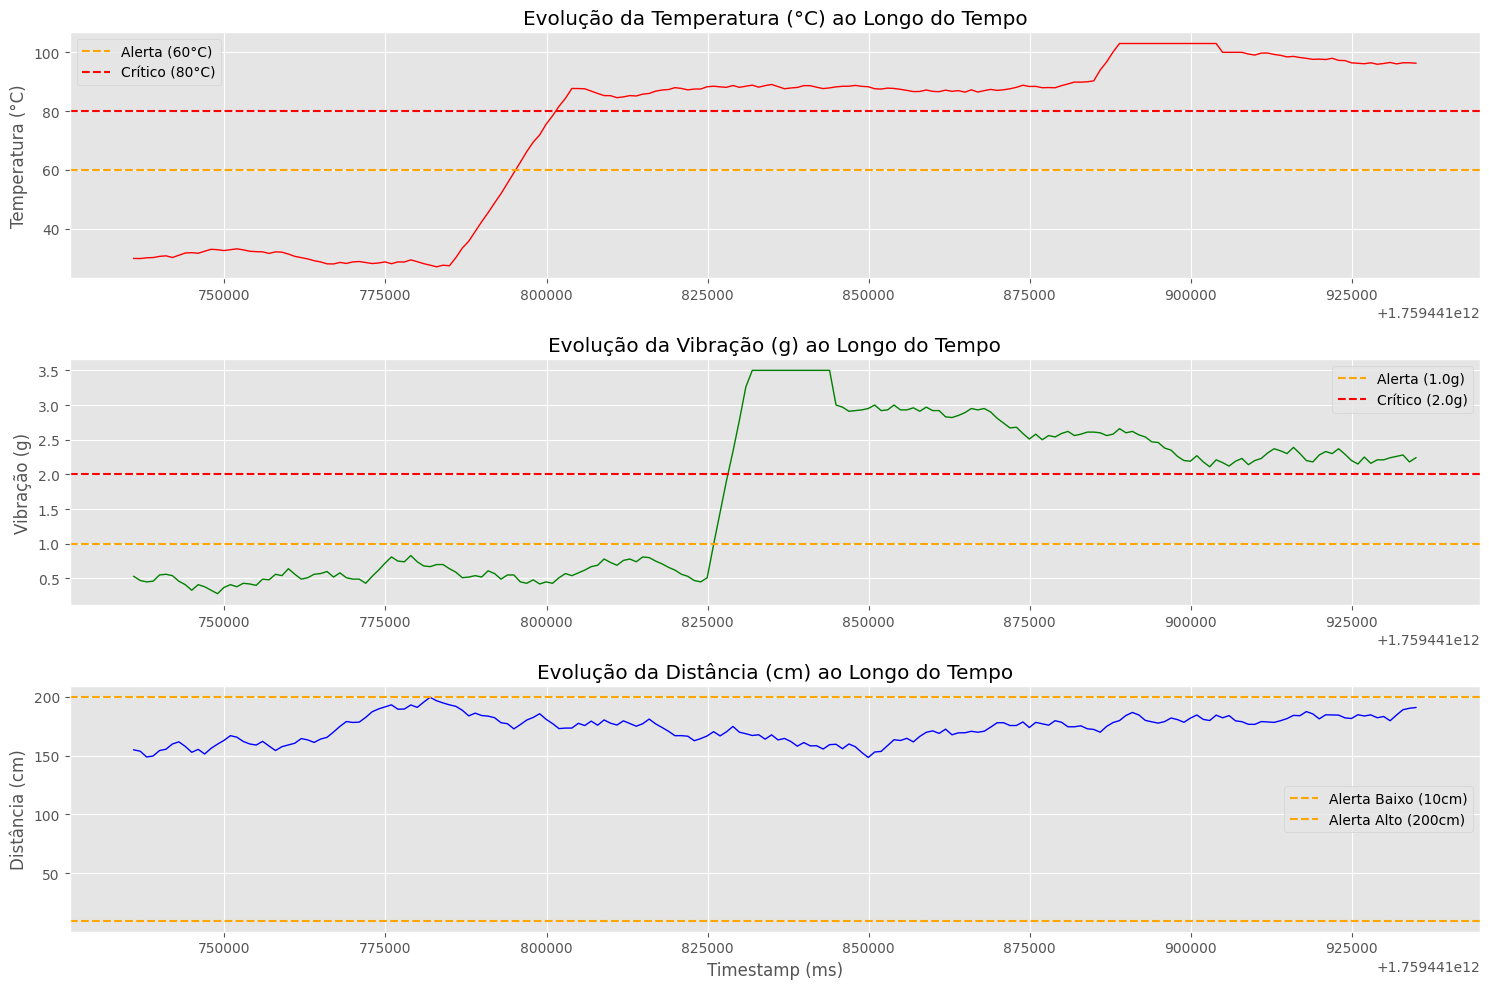

🔗 Analisando correlação entre sensores...


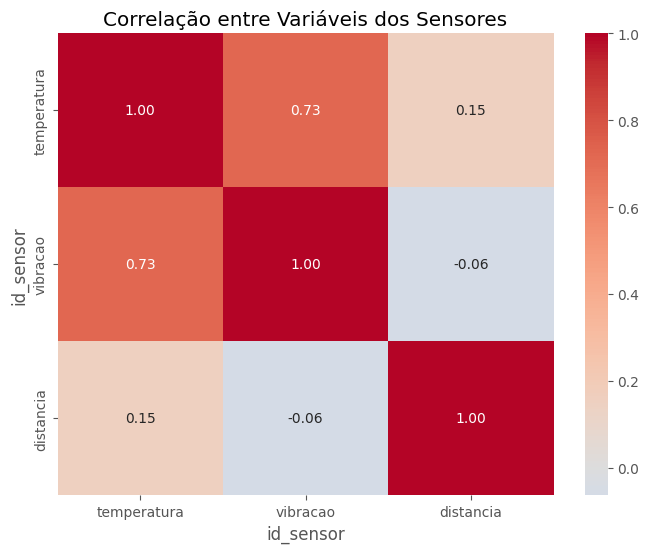

📊 Correlações identificadas:
   temperatura vs vibracao: 0.725
   temperatura vs distancia: 0.149
   vibracao vs distancia: -0.064
💾 Dados transformados salvos como 'dados_sensores_transformados.csv'

🎯 PARTE 2 CONCLUÍDA COM SUCESSO!
📁 Próximo passo: Engenharia de Features e ML


In [3]:
# %% [markdown]
# # 🚀 Sistema de Machine Learning Integrado - Monitoramento de Sensores
# ## Parte 2: Transformação e Análise Exploratória

# %%
# =============================================================================
# CONFIGURAÇÃO E CARREGAMENTO DOS DADOS PRÉ-PROCESSADOS
# =============================================================================
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import warnings
warnings.filterwarnings('ignore')

# Configurações de visualização
plt.style.use('ggplot')
sns.set_palette("husl")
%matplotlib inline

print("✅ Bibliotecas carregadas com sucesso!")

# %%
# =============================================================================
# CARREGAR DADOS DA PARTE 1
# =============================================================================
print("📂 Carregando dados pré-processados...")

try:
    # Tentar carregar dados da Parte 1
    df_sensores = pd.read_csv('dados_sensores_limpos.csv', sep=';')
    print(f"✅ Dados carregados: {df_sensores.shape[0]} leituras")

except FileNotFoundError:
    print("❌ Arquivo 'dados_sensores_limpos.csv' não encontrado.")
    print("📤 Execute a Parte 1 primeiro ou faça upload manual:")

    # Upload manual como fallback
    try:
        from google.colab import files
        uploaded = files.upload()
        filename = list(uploaded.keys())[0]
        df_sensores = pd.read_csv(filename, sep=';')
        print(f"✅ Arquivo carregado: {filename}")
    except:
        filename = input("📝 Digite o caminho do arquivo CSV: ")
        df_sensores = pd.read_csv(filename, sep=';')

# %%
# =============================================================================
# TRANSFORMAÇÃO PARA FORMATO WIDE
# =============================================================================
print("🔄 Transformando dados para formato wide...")

try:
    # Transformar dados para formato wide (uma coluna por sensor)
    df_wide = df_sensores.pivot_table(
        index=['id_local', 'data_hora_ms'],
        columns='id_sensor',
        values='valor'
    ).reset_index()

    # Renomear colunas para nomes significativos
    mapa_colunas = {
        1: 'temperatura',
        2: 'vibracao',
        3: 'distancia'
    }

    # Aplicar renomeação apenas para colunas existentes
    colunas_renomear = {}
    for col in df_wide.columns:
        if col in mapa_colunas:
            colunas_renomear[col] = mapa_colunas[col]

    df_wide = df_wide.rename(columns=colunas_renomear)
    df_wide = df_wide.sort_values('data_hora_ms').reset_index(drop=True)

    print("✅ Dados transformados com sucesso!")
    print(f"📊 Formato final: {df_wide.shape[0]} registros x {df_wide.shape[1]} colunas")

    # Exibir dados transformados
    print("\n🔍 Primeiras linhas dos dados transformados:")
    display(df_wide.head())

except Exception as e:
    print(f"❌ Erro na transformação: {e}")

# %%
# =============================================================================
# ANÁLISE EXPLORATÓRIA DOS DADOS
# =============================================================================
print("🔍 Realizando análise exploratória...")

# Estatísticas descritivas
print("📊 Estatísticas descritivas:")
colunas_numericas = [col for col in ['temperatura', 'vibracao', 'distancia'] if col in df_wide.columns]
display(df_wide[colunas_numericas].describe())

# %%
# =============================================================================
# VISUALIZAÇÃO DAS SÉRIES TEMPORAIS
# =============================================================================
print("📈 Gerando visualizações das séries temporais...")

plt.figure(figsize=(15, 10))

# Configurar thresholds baseados no código ESP32
thresholds = {
    'temperatura': {'alerta': 60, 'critico': 80},
    'vibracao': {'alerta': 1.0, 'critico': 2.0},
    'distancia': {'alerta_baixo': 10, 'alerta_alto': 200}
}

# Plot para cada sensor disponível
sensores_plot = []
if 'temperatura' in df_wide.columns:
    sensores_plot.append(('temperatura', 'red', 'Temperatura (°C)'))
if 'vibracao' in df_wide.columns:
    sensores_plot.append(('vibracao', 'green', 'Vibração (g)'))
if 'distancia' in df_wide.columns:
    sensores_plot.append(('distancia', 'blue', 'Distância (cm)'))

for i, (sensor, cor, label) in enumerate(sensores_plot):
    plt.subplot(len(sensores_plot), 1, i+1)
    plt.plot(df_wide['data_hora_ms'], df_wide[sensor], color=cor, linewidth=1)

    # Adicionar linhas de threshold
    if sensor == 'temperatura':
        plt.axhline(y=thresholds[sensor]['alerta'], color='orange', linestyle='--', label='Alerta (60°C)')
        plt.axhline(y=thresholds[sensor]['critico'], color='red', linestyle='--', label='Crítico (80°C)')
    elif sensor == 'vibracao':
        plt.axhline(y=thresholds[sensor]['alerta'], color='orange', linestyle='--', label='Alerta (1.0g)')
        plt.axhline(y=thresholds[sensor]['critico'], color='red', linestyle='--', label='Crítico (2.0g)')
    elif sensor == 'distancia':
        plt.axhline(y=thresholds[sensor]['alerta_baixo'], color='orange', linestyle='--', label='Alerta Baixo (10cm)')
        plt.axhline(y=thresholds[sensor]['alerta_alto'], color='orange', linestyle='--', label='Alerta Alto (200cm)')

    plt.title(f'Evolução da {label} ao Longo do Tempo')
    plt.ylabel(label)
    plt.legend()
    plt.grid(True)

plt.xlabel('Timestamp (ms)')
plt.tight_layout()
plt.show()

# %%
# =============================================================================
# MATRIZ DE CORRELAÇÃO
# =============================================================================
print("🔗 Analisando correlação entre sensores...")

if len(colunas_numericas) > 1:
    correlation_matrix = df_wide[colunas_numericas].corr()
    plt.figure(figsize=(8, 6))
    sns.heatmap(correlation_matrix, annot=True, cmap='coolwarm', center=0, fmt='.2f')
    plt.title('Correlação entre Variáveis dos Sensores')
    plt.show()

    print("📊 Correlações identificadas:")
    for i in range(len(colunas_numericas)):
        for j in range(i+1, len(colunas_numericas)):
            corr = correlation_matrix.iloc[i, j]
            print(f"   {colunas_numericas[i]} vs {colunas_numericas[j]}: {corr:.3f}")
else:
    print("⚠️  Número insuficiente de sensores para análise de correlação")

# %%
# =============================================================================
# SALVAR DADOS TRANSFORMADOS
# =============================================================================
df_wide.to_csv('dados_sensores_transformados.csv', index=False)
print("💾 Dados transformados salvos como 'dados_sensores_transformados.csv'")

print("\n" + "="*60)
print("🎯 PARTE 2 CONCLUÍDA COM SUCESSO!")
print("📁 Próximo passo: Engenharia de Features e ML")
print("="*60)

✅ Bibliotecas de ML carregadas com sucesso!
📂 Carregando dados transformados...
✅ Dados carregados: 200 registros

🔍 Dados carregados:


,id_local,data_hora_ms,temperatura,vibracao,distancia
0,1,1759441735937,29.88,0.53,154.86
1,2,1759441736937,29.84,0.47,153.72
2,3,1759441737937,30.10,0.45,148.78
3,4,1759441738937,30.18,0.46,149.63
4,5,1759441739937,30.58,0.55,154.26


⚙️ Realizando engenharia de features...
✅ Features criadas:
- Sensores disponíveis: ['temperatura', 'vibracao', 'distancia']
- Features temporais: hora, minuto
- Features de tendência: diff de cada sensor
- Features estatísticas: médias móveis

📊 Total de features: 14 colunas
🔍 Primeiras linhas com novas features:


,id_local,data_hora_ms,temperatura,vibracao,distancia,timestamp,hora,minuto,temperatura_tendencia,vibracao_tendencia,distancia_tendencia,temperatura_media_movel,vibracao_media_movel,distancia_media_movel
0,1,1759441735937,29.88,0.53,154.86,2025-10-02 21:48:55.937,21,48,-0.04,-0.06,-1.14,29.880,0.530000,154.860000
1,2,1759441736937,29.84,0.47,153.72,2025-10-02 21:48:56.937,21,48,-0.04,-0.06,-1.14,29.860,0.500000,154.290000
2,3,1759441737937,30.10,0.45,148.78,2025-10-02 21:48:57.937,21,48,0.26,-0.02,-4.94,29.940,0.483333,152.453333
3,4,1759441738937,30.18,0.46,149.63,2025-10-02 21:48:58.937,21,48,0.08,0.01,0.85,30.000,0.477500,151.747500
4,5,1759441739937,30.58,0.55,154.26,2025-10-02 21:48:59.937,21,48,0.40,0.09,4.63,30.116,0.492000,152.250000


🔍 Treinando modelo de detecção de anomalias...
✅ Anomalias detectadas: 20 / 200


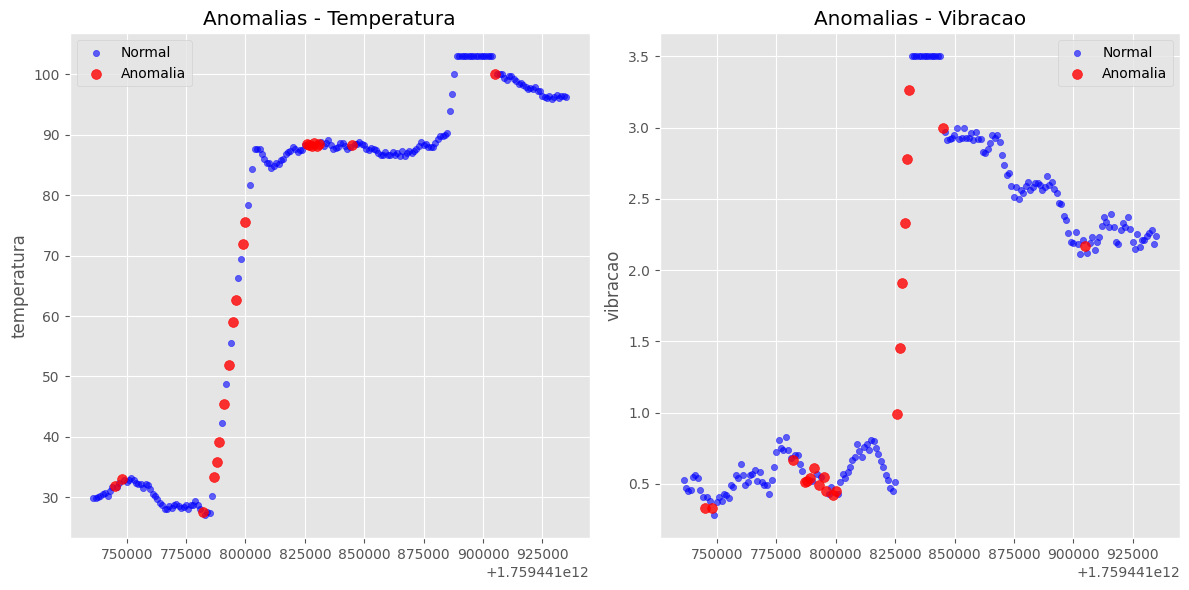

💾 Dados com features salvos como 'dados_com_features.csv'

🎯 PARTE 3 CONCLUÍDA COM SUCESSO!
📁 Próximo passo: Classificação e Clusterização


In [4]:
# %% [markdown]
# # 🚀 Sistema de Machine Learning Integrado - Monitoramento de Sensores
# ## Parte 3: Engenharia de Features e Machine Learning

# %%
# =============================================================================
# CONFIGURAÇÃO E IMPORTAÇÕES DE ML
# =============================================================================
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from datetime import datetime
import warnings
warnings.filterwarnings('ignore')

# Machine Learning
from sklearn.ensemble import RandomForestClassifier, IsolationForest
from sklearn.cluster import KMeans
from sklearn.preprocessing import StandardScaler, LabelEncoder
from sklearn.model_selection import train_test_split, cross_val_score
from sklearn.metrics import classification_report, confusion_matrix, accuracy_score

print("✅ Bibliotecas de ML carregadas com sucesso!")

# %%
# =============================================================================
# CARREGAR DADOS TRANSFORMADOS
# =============================================================================
print("📂 Carregando dados transformados...")

try:
    df_wide = pd.read_csv('dados_sensores_transformados.csv')
    print(f"✅ Dados carregados: {df_wide.shape[0]} registros")

except FileNotFoundError:
    print("❌ Arquivo 'dados_sensores_transformados.csv' não encontrado.")
    print("📤 Execute a Parte 2 primeiro ou carregue dados manualmente:")

    # Upload manual como fallback
    try:
        from google.colab import files
        uploaded = files.upload()
        filename = list(uploaded.keys())[0]
        df_wide = pd.read_csv(filename)
        print(f"✅ Arquivo carregado: {filename}")
    except:
        filename = input("📝 Digite o caminho do arquivo CSV: ")
        df_wide = pd.read_csv(filename)

# Exibir dados carregados
print("\n🔍 Dados carregados:")
display(df_wide.head())

# %%
# =============================================================================
# ENGENHARIA DE FEATURES
# =============================================================================
print("⚙️ Realizando engenharia de features...")

# Criar features temporais
df_wide['timestamp'] = pd.to_datetime(df_wide['data_hora_ms'], unit='ms')
df_wide['hora'] = df_wide['timestamp'].dt.hour
df_wide['minuto'] = df_wide['timestamp'].dt.minute

# Criar features de tendência
sensores_disponiveis = []
for sensor in ['temperatura', 'vibracao', 'distancia']:
    if sensor in df_wide.columns:
        sensores_disponiveis.append(sensor)
        df_wide[f'{sensor}_tendencia'] = df_wide[sensor].diff()

# Criar features estatísticas (médias móveis)
for sensor in sensores_disponiveis:
    df_wide[f'{sensor}_media_movel'] = df_wide[sensor].rolling(window=5, min_periods=1).mean()

# Preencher valores NaN
df_wide = df_wide.fillna(method='bfill')

print("✅ Features criadas:")
print(f"- Sensores disponíveis: {sensores_disponiveis}")
print(f"- Features temporais: hora, minuto")
print(f"- Features de tendência: diff de cada sensor")
print(f"- Features estatísticas: médias móveis")

# Exibir features criadas
print(f"\n📊 Total de features: {df_wide.shape[1]} colunas")
print("🔍 Primeiras linhas com novas features:")
display(df_wide.head())

# %%
# =============================================================================
# DETECÇÃO DE ANOMALIAS COM ISOLATION FOREST
# =============================================================================
print("🔍 Treinando modelo de detecção de anomalias...")

# Preparar dados para detecção de anomalias
features_anomalia = sensores_disponiveis + [f'{sensor}_tendencia' for sensor in sensores_disponiveis]
features_anomalia = [f for f in features_anomalia if f in df_wide.columns]

if len(features_anomalia) >= 2:  # Mínimo de 2 features para Isolation Forest
    X_anomalia = df_wide[features_anomalia]

    # Treinar Isolation Forest
    iso_forest = IsolationForest(contamination=0.1, random_state=42)
    anomaly_predictions = iso_forest.fit_predict(X_anomalia)

    # Adicionar previsões ao dataframe
    df_wide['anomalia'] = anomaly_predictions
    df_wide['anomalia_score'] = iso_forest.decision_function(X_anomalia)
    df_wide['status_anomalia'] = df_wide['anomalia'].map({1: 'Normal', -1: 'Anomalia'})

    print(f"✅ Anomalias detectadas: {(df_wide['anomalia'] == -1).sum()} / {len(df_wide)}")

    # Visualização das anomalias
    plt.figure(figsize=(12, 6))

    for i, sensor in enumerate(sensores_disponiveis[:2]):  # Mostrar até 2 sensores
        plt.subplot(1, 2, i+1)
        normal_data = df_wide[df_wide['anomalia'] == 1]
        anomaly_data = df_wide[df_wide['anomalia'] == -1]

        plt.scatter(normal_data['data_hora_ms'], normal_data[sensor],
                   c='blue', alpha=0.6, label='Normal', s=20)
        plt.scatter(anomaly_data['data_hora_ms'], anomaly_data[sensor],
                   c='red', alpha=0.8, label='Anomalia', s=50)
        plt.title(f'Anomalias - {sensor.title()}')
        plt.ylabel(sensor)
        plt.legend()
        plt.grid(True)

    plt.tight_layout()
    plt.show()

else:
    print("⚠️  Features insuficientes para detecção de anomalias")

# %%
# =============================================================================
# SALVAR DADOS COM FEATURES
# =============================================================================
df_wide.to_csv('dados_com_features.csv', index=False)
print("💾 Dados com features salvos como 'dados_com_features.csv'")

print("\n" + "="*60)
print("🎯 PARTE 3 CONCLUÍDA COM SUCESSO!")
print("📁 Próximo passo: Classificação e Clusterização")
print("="*60)

✅ Bibliotecas finais carregadas!
📂 Carregando dados com features...
✅ Dados carregados: 200 registros
🚨 Treinando modelo de classificação de alertas...
📊 Distribuição dos estados de alerta:
estado_alerta
CRITICO    134
NORMAL      60
ALERTA       6
Name: count, dtype: int64
🎯 Acurácia do modelo: 1.000


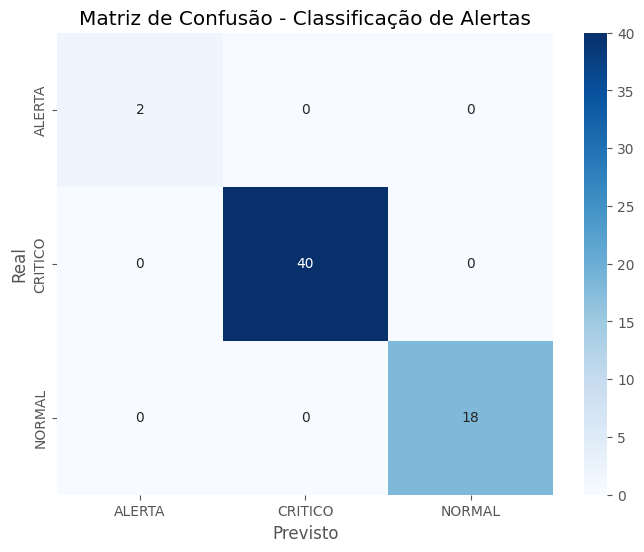


📋 Relatório de classificação:
              precision    recall  f1-score   support

      ALERTA       1.00      1.00      1.00         2
     CRITICO       1.00      1.00      1.00        40
      NORMAL       1.00      1.00      1.00        18

    accuracy                           1.00        60
   macro avg       1.00      1.00      1.00        60
weighted avg       1.00      1.00      1.00        60

🔮 Aplicando clusterização para identificar padrões...
📊 Análise dos clusters:


temperatura        vibracao       distancia      
               mean    std     mean   std      mean   std
cluster                                                  
0             59.91  26.19     0.61  0.13    180.35  8.67
1             93.25   6.07     2.64  0.44    173.87  9.63
2             31.10   1.45     0.47  0.09    158.97  5.11

📊 Calculando métricas finais do sistema...
🎯 KPIs do Sistema de ML:
  Total de Leituras: 200
  Sensores Ativos: 3
  Alertas Críticos: 134
  Alertas de Atenção: 6
  Taxa de Anomalias: 10.0%
  Acurácia do Classificador: 1.000
💾 Exportando modelos e resultados...
✅ Exportação concluída!
📁 Arquivos salvos:
   - models/*.pkl (modelos treinados)
   - models/ml_results.json (métricas)
   - dados_finais_ml.csv (dados processados)
📈 Gerando dashboard final...


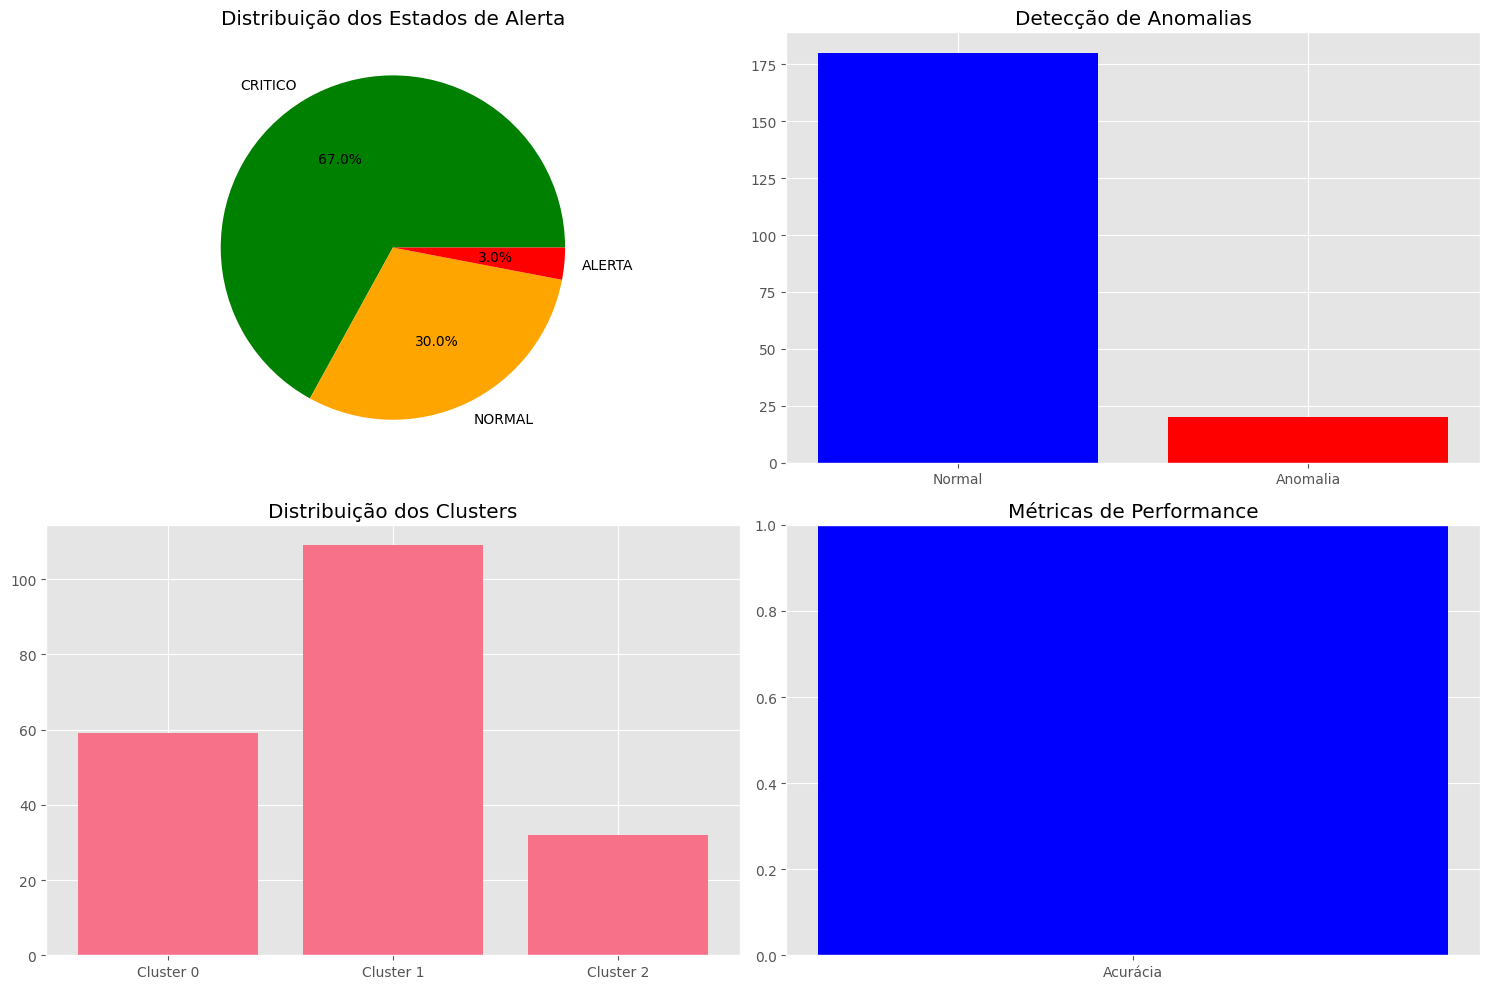


🎯 SISTEMA DE MACHINE LEARNING - IMPLEMENTADO COM SUCESSO

📊 RESUMO DA IMPLEMENTAÇÃO:
✅ Total de Leituras: 200
✅ Sensores Ativos: 3
✅ Alertas Críticos: 134
✅ Alertas de Atenção: 6
✅ Taxa de Anomalias: 10.0%
✅ Acurácia do Classificador: 1.000

🚨 PRÓXIMOS PASSOS:
   1. Integrar com dashboard Streamlit
   2. Implementar alertas em tempo real
   3. Conectar com API do banco de dados
   4. Deploy do sistema integrado



In [6]:
# %% [markdown]
# # 🚀 Sistema de Machine Learning Integrado - Monitoramento de Sensores
# ## Parte 4: Classificação, Clusterização e Resultados Finais

# %%
# =============================================================================
# CONFIGURAÇÃO FINAL
# =============================================================================
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import joblib
import json
import os
from sklearn.ensemble import RandomForestClassifier
from sklearn.cluster import KMeans
from sklearn.preprocessing import StandardScaler, LabelEncoder
from sklearn.model_selection import train_test_split, cross_val_score
from sklearn.metrics import classification_report, confusion_matrix, accuracy_score

print("✅ Bibliotecas finais carregadas!")

# %%
# =============================================================================
# CARREGAR DADOS COM FEATURES
# =============================================================================
print("📂 Carregando dados com features...")

try:
    df_wide = pd.read_csv('dados_com_features.csv')
    print(f"✅ Dados carregados: {df_wide.shape[0]} registros")

except FileNotFoundError:
    print("❌ Arquivo 'dados_com_features.csv' não encontrado.")
    print("📤 Execute a Parte 3 primeiro ou carregue dados manualmente:")

    try:
        from google.colab import files
        uploaded = files.upload()
        filename = list(uploaded.keys())[0]
        df_wide = pd.read_csv(filename)
    except:
        filename = input("📝 Digite o caminho do arquivo CSV: ")
        df_wide = pd.read_csv(filename)

# %%
# =============================================================================
# CLASSIFICAÇÃO DE ESTADOS DE ALERTA
# =============================================================================
print("🚨 Treinando modelo de classificação de alertas...")

# Definir estados baseados nos thresholds do ESP32
def definir_estado_alerta(temp, vib, dist):
    if temp is not None and temp >= 80:
        return 'CRITICO'
    elif vib is not None and vib >= 2.0:
        return 'CRITICO'
    elif dist is not None and dist <= 5:
        return 'CRITICO'
    elif temp is not None and temp >= 60:
        return 'ALERTA'
    elif vib is not None and vib >= 1.0:
        return 'ALERTA'
    elif dist is not None and (dist <= 10 or dist >= 200):
        return 'ALERTA'
    else:
        return 'NORMAL'

# Aplicar função para criar target
alertas = []
for _, row in df_wide.iterrows():
    temp = row.get('temperatura')
    vib = row.get('vibracao')
    dist = row.get('distancia')
    alertas.append(definir_estado_alerta(temp, vib, dist))

df_wide['estado_alerta'] = alertas

print("📊 Distribuição dos estados de alerta:")
print(df_wide['estado_alerta'].value_counts())

# %%
# Preparar dados para classificação
features_classificacao = []
for sensor in ['temperatura', 'vibracao', 'distancia']:
    if sensor in df_wide.columns:
        features_classificacao.append(sensor)
        if f'{sensor}_media_movel' in df_wide.columns:
            features_classificacao.append(f'{sensor}_media_movel')

if len(features_classificacao) >= 2 and 'estado_alerta' in df_wide.columns:
    X_class = df_wide[features_classificacao]
    y_class = df_wide['estado_alerta']

    # Codificar target
    le = LabelEncoder()
    y_encoded = le.fit_transform(y_class)

    # Dividir dados
    X_train, X_test, y_train, y_test = train_test_split(
        X_class, y_encoded, test_size=0.3, random_state=42, stratify=y_encoded
    )

    # Treinar Random Forest
    rf_classifier = RandomForestClassifier(n_estimators=100, random_state=42)
    rf_classifier.fit(X_train, y_train)

    # Fazer previsões
    y_pred = rf_classifier.predict(X_test)

    # Avaliar modelo
    accuracy = accuracy_score(y_test, y_pred)
    print(f"🎯 Acurácia do modelo: {accuracy:.3f}")

    # Matriz de confusão
    plt.figure(figsize=(8, 6))
    cm = confusion_matrix(y_test, y_pred)
    sns.heatmap(cm, annot=True, fmt='d', cmap='Blues',
                xticklabels=le.classes_, yticklabels=le.classes_)
    plt.title('Matriz de Confusão - Classificação de Alertas')
    plt.ylabel('Real')
    plt.xlabel('Previsto')
    plt.show()

    # Relatório de classificação
    print("\n📋 Relatório de classificação:")
    print(classification_report(y_test, y_pred, target_names=le.classes_))

else:
    print("⚠️  Dados insuficientes para classificação")

# %%
# =============================================================================
# CLUSTERIZAÇÃO PARA PADRÕES DE OPERAÇÃO
# =============================================================================
print("🔮 Aplicando clusterização para identificar padrões...")

# Preparar dados para clusterização
features_cluster = [f for f in ['temperatura', 'vibracao', 'distancia'] if f in df_wide.columns]

if len(features_cluster) >= 2:
    X_cluster = df_wide[features_cluster]

    # Padronizar dados
    scaler = StandardScaler()
    X_scaled = scaler.fit_transform(X_cluster)

    # Aplicar KMeans
    kmeans = KMeans(n_clusters=min(3, len(X_cluster)), random_state=42)
    df_wide['cluster'] = kmeans.fit_predict(X_scaled)

    # Análise dos clusters
    cluster_analysis = df_wide.groupby('cluster').agg({
        'temperatura': ['mean', 'std'] if 'temperatura' in df_wide.columns else 'count',
        'vibracao': ['mean', 'std'] if 'vibracao' in df_wide.columns else 'count',
        'distancia': ['mean', 'std'] if 'distancia' in df_wide.columns else 'count'
    }).round(2)

    print("📊 Análise dos clusters:")
    display(cluster_analysis)

else:
    print("⚠️  Dados insuficientes para clusterização")

# %%
# =============================================================================
# MÉTRICAS FINAIS E EXPORTAÇÃO
# =============================================================================
print("📊 Calculando métricas finais do sistema...")

# Criar diretório para modelos
os.makedirs('models', exist_ok=True)

# Métricas do sistema
kpis = {
    'Total de Leituras': len(df_wide),
    'Sensores Ativos': len([s for s in ['temperatura', 'vibracao', 'distancia'] if s in df_wide.columns]),
    'Alertas Críticos': int((df_wide['estado_alerta'] == 'CRITICO').sum()) if 'estado_alerta' in df_wide.columns else 0,
    'Alertas de Atenção': int((df_wide['estado_alerta'] == 'ALERTA').sum()) if 'estado_alerta' in df_wide.columns else 0,
}

if 'anomalia' in df_wide.columns:
    kpis['Taxa de Anomalias'] = f"{(df_wide['anomalia'] == -1).mean() * 100:.1f}%"

if 'accuracy' in locals():
    kpis['Acurácia do Classificador'] = f"{accuracy:.3f}"

print("🎯 KPIs do Sistema de ML:")
for kpi, valor in kpis.items():
    print(f"  {kpi}: {valor}")

# %%
# =============================================================================
# EXPORTAÇÃO DE MODELOS E RESULTADOS
# =============================================================================
print("💾 Exportando modelos e resultados...")

# Salvar modelos treinados
if 'iso_forest' in locals():
    joblib.dump(iso_forest, 'models/isolation_forest.pkl')
if 'rf_classifier' in locals():
    joblib.dump(rf_classifier, 'models/random_forest_classifier.pkl')
if 'kmeans' in locals():
    joblib.dump(kmeans, 'models/kmeans_cluster.pkl')
if 'scaler' in locals():
    joblib.dump(scaler, 'models/scaler.pkl')
if 'le' in locals():
    joblib.dump(le, 'models/label_encoder.pkl')

# Convert numpy int64 values to standard integers for JSON serialization
results = {
    'kpis': {k: int(v) if isinstance(v, np.int64) else v for k, v in kpis.items()},
    'model_metrics': {
        'classification_accuracy': float(accuracy) if 'accuracy' in locals() else 0.0,
    }
}

with open('models/ml_results.json', 'w') as f:
    json.dump(results, f, indent=2)

# Salvar dados finais
df_wide.to_csv('dados_finais_ml.csv', index=False)

print("✅ Exportação concluída!")
print("📁 Arquivos salvos:")
print("   - models/*.pkl (modelos treinados)")
print("   - models/ml_results.json (métricas)")
print("   - dados_finais_ml.csv (dados processados)")

# %%
# =============================================================================
# VISUALIZAÇÃO FINAL
# =============================================================================
print("📈 Gerando dashboard final...")

plt.figure(figsize=(15, 10))

# Painel de estados de alerta
plt.subplot(2, 2, 1)
if 'estado_alerta' in df_wide.columns:
    alert_counts = df_wide['estado_alerta'].value_counts()
    colors = ['green', 'orange', 'red'][:len(alert_counts)]
    plt.pie(alert_counts.values, labels=alert_counts.index, autopct='%1.1f%%', colors=colors)
    plt.title('Distribuição dos Estados de Alerta')

# Painel de anomalias
plt.subplot(2, 2, 2)
if 'status_anomalia' in df_wide.columns:
    anomaly_counts = df_wide['status_anomalia'].value_counts()
    plt.bar(anomaly_counts.index, anomaly_counts.values, color=['blue', 'red'])
    plt.title('Detecção de Anomalias')

# Painel de clusters
plt.subplot(2, 2, 3)
if 'cluster' in df_wide.columns:
    cluster_counts = df_wide['cluster'].value_counts().sort_index()
    plt.bar([f'Cluster {i}' for i in cluster_counts.index], cluster_counts.values)
    plt.title('Distribuição dos Clusters')

# Painel de performance
plt.subplot(2, 2, 4)
if 'accuracy' in locals():
    metrics = ['Acurácia']
    scores = [accuracy]
    plt.bar(metrics, scores, color=['blue'])
    plt.ylim(0, 1)
    plt.title('Métricas de Performance')

plt.tight_layout()
plt.show()

# %%
# =============================================================================
# RESUMO FINAL
# =============================================================================
print("\n" + "="*60)
print("🎯 SISTEMA DE MACHINE LEARNING - IMPLEMENTADO COM SUCESSO")
print("="*60)

print("\n📊 RESUMO DA IMPLEMENTAÇÃO:")
for kpi, valor in kpis.items():
    print(f"✅ {kpi}: {valor}")

print(f"\n🚨 PRÓXIMOS PASSOS:")
print("   1. Integrar com dashboard Streamlit")
print("   2. Implementar alertas em tempo real")
print("   3. Conectar com API do banco de dados")
print("   4. Deploy do sistema integrado")

print("\n" + "="*60)